# Iris Flower Classification
The goal of this task is to create a model that can accurately predict the species of an iris flower based on its sepal length, sepal width, petal length, and petal width. In this poster, we will explore the process of building a machine learning model for iris flower classification and highlight some of the key techniques used.  
Iris is the family in the flower which contains the several species such as the setosa, versicolor, virginica, etc.  
The iris flower dataset is a classic dataset in machine learning that contains measurements for 150 iris flowers from three different species: Setosa, Versicolor, and Virginica. Each flower is described by four features: sepal length, sepal width, petal length, and petal width. The dataset is commonly used as a benchmark for machine learning algorithms.

## Dataset: https://www.kaggle.com/datasets/arshid/iris-flower-dataset

In [1]:
#We begin with importing all the necessary libraries
#For Data Analysis
import numpy as np
import pandas as pd
#For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#For Machine Learning
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#To ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the dataset from csv into a python pandas dataframe
data = pd.read_csv(r"D:\AISSMS IOIT - AI&DS (628299510)\General\CodSoft\Iris-Dataset.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis

In [3]:
data.shape

(150, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Data Visualization

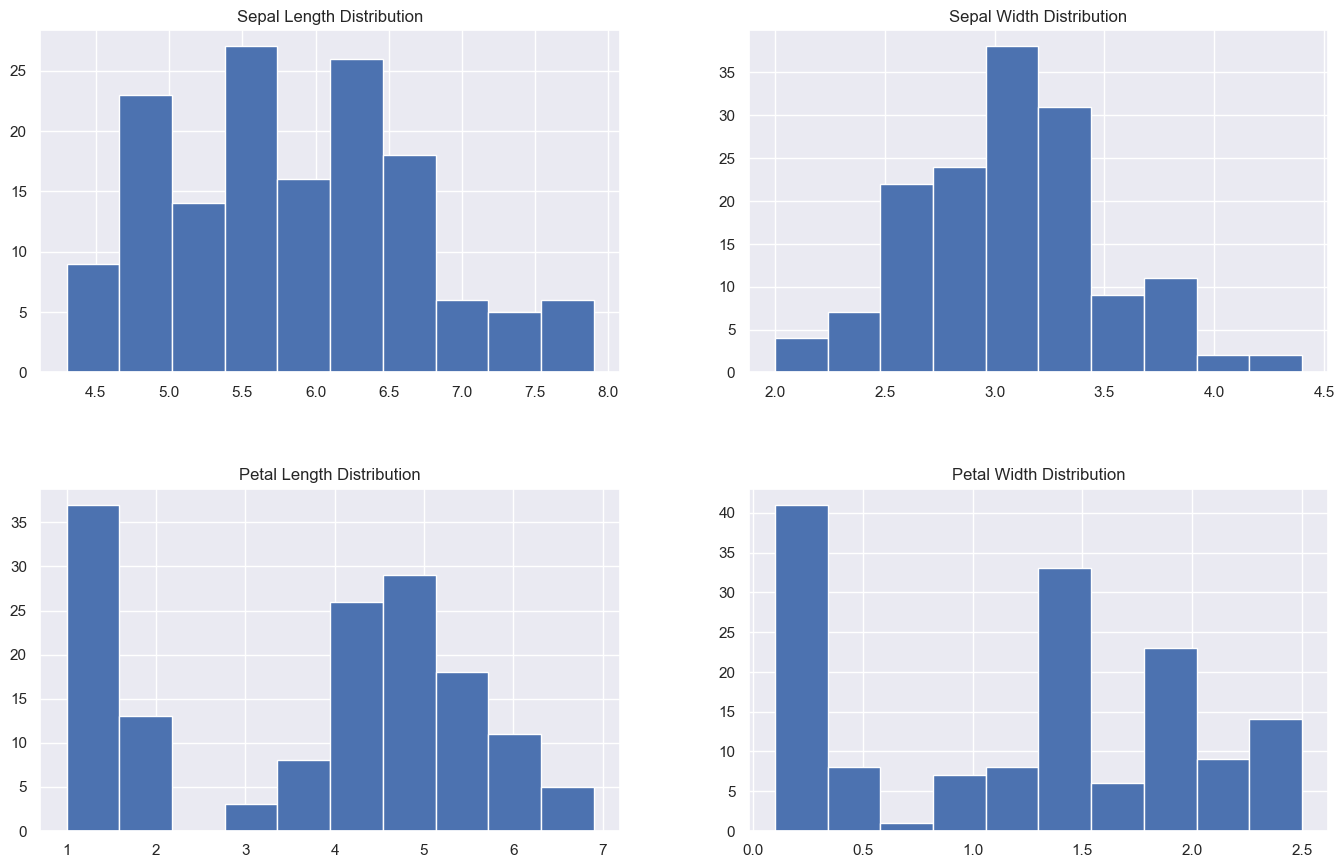

In [10]:
# Set the aesthetic style of the plots
sns.set()
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.tight_layout(pad=5.0)

data["sepal_length"].hist(ax=axes[0, 0])
axes[0, 0].set_title("Sepal Length Distribution")

data["sepal_width"].hist(ax=axes[0, 1])
axes[0, 1].set_title("Sepal Width Distribution")

data["petal_length"].hist(ax=axes[1, 0])
axes[1, 0].set_title("Petal Length Distribution")

data["petal_width"].hist(ax=axes[1, 1])
axes[1, 1].set_title("Petal Width Distribution")

plt.show()

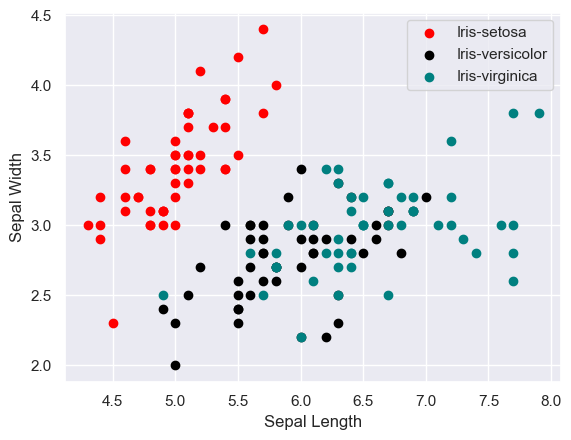

In [13]:
colors = ["red", "Black", "teal"]
species = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
for i in range(3):
    x = data[data["species"] == species[i]]
    plt.scatter(x["sepal_length"], x["sepal_width"], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

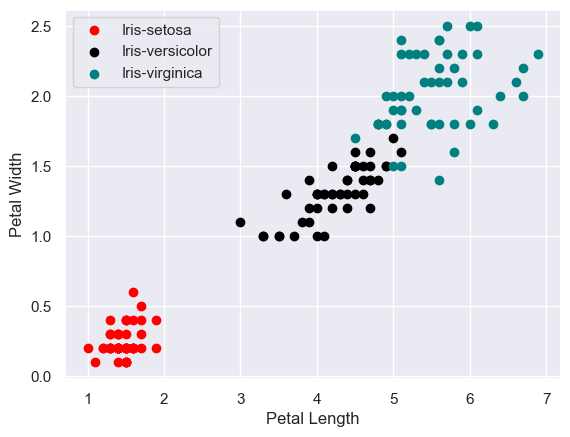

In [15]:
for i in range(3):
    x = data[data["species"] == species[i]]
    plt.scatter(x["petal_length"], x["petal_width"], c = colors[i], label = species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

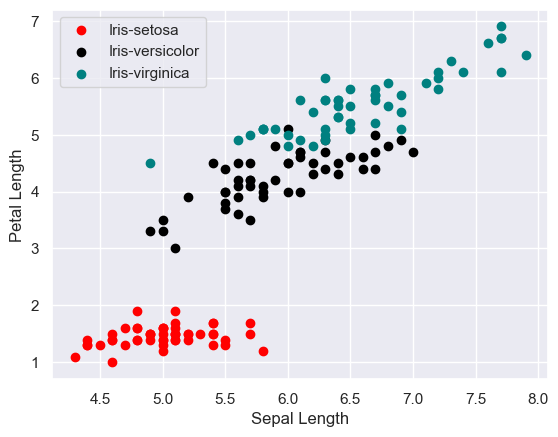

In [16]:
for i in range(3):
    x = data[data["species"] == species[i]]
    plt.scatter(x["sepal_length"], x["petal_length"], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

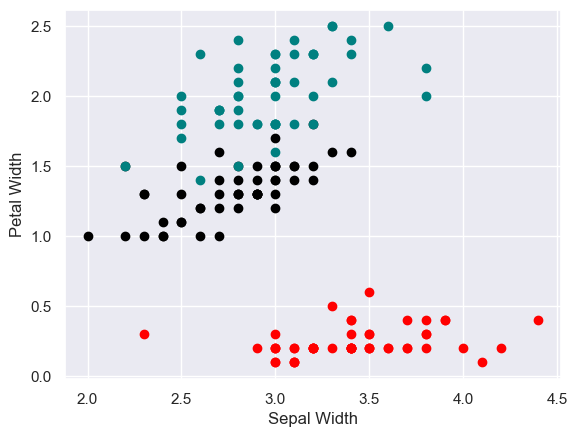

In [17]:
for i in range(3):
    x = data[data["species"] == species[i]]
    plt.scatter(x["sepal_width"], x["petal_width"], c = colors[i], label = species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend

<Axes: >

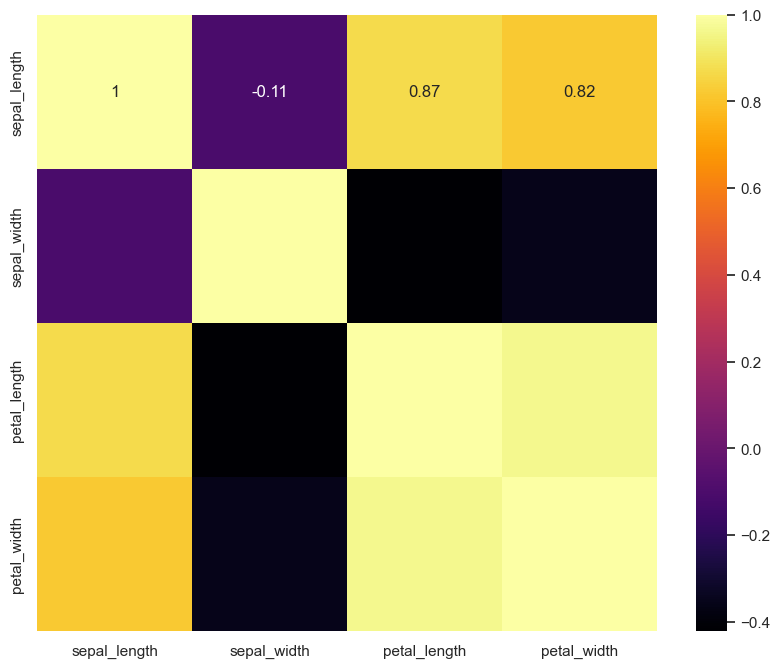

In [20]:
numeric_cols = data.select_dtypes(include = "number")
corr = numeric_cols.corr()
fig, axis = plt.subplots(figsize = (10, 8))
sns.heatmap(corr, annot = True, ax = axis, cmap = "inferno")

# Data Preparation

In [21]:
le=LabelEncoder()
data["species"] = le.fit_transform(data["species"])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Feature Selection

In [22]:
X = data.drop(columns = "species")
Y = data["species"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# Model Building

In [29]:
#Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, Y_train)

LogisticRegression()

In [27]:
#K Nearest Neighbours
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [28]:
#Decision Trees
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

DecisionTreeClassifier()

# Model Evaluation

In [30]:
LR_accuracy = LR.score(X_test, Y_test)*100
KNN_accuracy = KNN.score(X_test, Y_test)*100
DT_accuracy = DT.score(X_test, Y_test)*100

In [31]:
print(f"Accuracy by using Logistic Regression: {LR_accuracy}%")
print(f"Accuracy by using K Nearest Neighbors Algorithm: {KNN_accuracy}%")
print(f"Accuracy by using Decision Tree Classifier: {DT_accuracy}%")

Accuracy by using Logistic Regression: 100.0%
Accuracy by using K Nearest Neighbors Algorithm: 100.0%
Accuracy by using Decision Tree Classifier: 100.0%


In [32]:
# Thank You!!!